# Deep Learning Notebook of project Building-Perceptron

## Introduction (must be done in english)

## Imports

In [2]:
# !pip install --upgrade pip
# !pip install boruta

In [3]:
# run pipreqs --force in notebook for imports outside of

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration
import missingno as msno
# import statsmodels.api as sm
from sklearn.metrics import confusion_matrix

# Feature Selection & Importance & VIF
import shap
shap.initjs()
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split


# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# metrics
from sklearn.metrics import accuracy_score, recall_score
from tensorflow.keras.metrics import Recall
from tensorflow.keras.callbacks import EarlyStopping


# saving dataframe as img
import dataframe_image as dfi

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


2024-12-09 12:03:35.338393: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-09 12:03:35.429737: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-09 12:03:36.040421: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-09 12:03:36.042721: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-09 12:03:37.792018: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

### Custom Imports

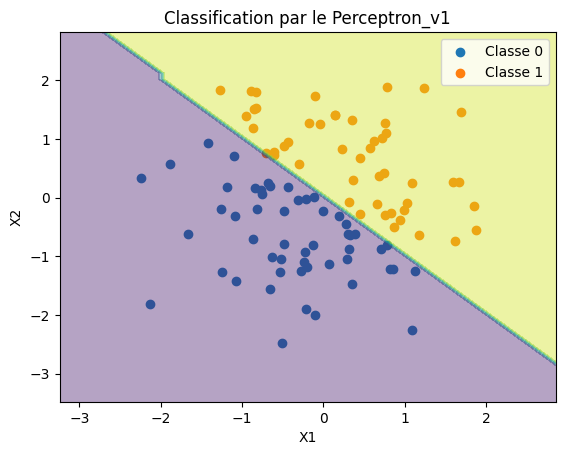

Précision sur l'ensemble de test : 1.00


In [5]:
from functions import compare_feature_lists
from Perceptron import visualize_data

### Sns Styles

In [6]:

orange = "#FFA500"
purple = "#800080"
grey = "#808080"

custom_palette = ["#FFA500", "#FF8C00", "#FF5500", "#FF2200", "#800040", "#400080", "#800080", "#808080", "#808080"]

custom_palette_f5 = [
    purple   ,  # purple
    '#3B528B',  # Blue
    orange   ,  #orange
    '#21918C',  # Green
    # '#5DC863',  # Yellow-Green
    grey     ,  #grey
    # '#FDE725'   # Yellow
]

viridis_colors = [
    purple   ,  # Purple
    '#3B528B',  # Blue
    '#21918C',  # Green
    '#5DC863',  # Yellow-Green
    '#FDE725'   # Yellow
]

sns.set_palette(custom_palette)


### Importing Perceptron class

In [7]:
from Perceptron import Perceptron_v1

### Importing constants

In [8]:
from constants import DATA_PATH

## Data Exploration

### Loading Data

In [9]:
original_df = pd.read_csv(DATA_PATH)
# shuffling df to prepare for eventual data reduction from balancing target
df = original_df.sample(frac=1).reset_index(drop=True)

### Exploratory analysis

#### General checks

In [10]:
df.shape

(569, 33)

In [11]:
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,922297,B,13.87,20.70,89.77,584.8,0.09578,0.1018,0.03688,0.02369,...,24.75,99.17,688.6,0.1264,0.2037,0.1377,0.06845,0.2249,0.08492,NaN
1,911296202,M,27.42,26.27,186.90,2501.0,0.10840,0.1988,0.36350,0.16890,...,31.37,251.20,4254.0,0.1357,0.4256,0.6833,0.26250,0.2641,0.07427,NaN


In [12]:
df.duplicated().sum()

0

In [13]:
df.dtypes.value_counts().index

Index([float64, int64, object], dtype='object')

In [14]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [15]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [16]:
df["Unnamed: 32"]

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
564   NaN
565   NaN
566   NaN
567   NaN
568   NaN
Name: Unnamed: 32, Length: 569, dtype: float64

In [17]:
df.drop(columns = ["Unnamed: 32"], inplace=True)

In [18]:
percentage_missing = df.isnull().sum().sort_values(ascending = False)/df.shape[0]*100
print(f"{percentage_missing[percentage_missing<30].count()} beneficial features")
percentage_missing

32 beneficial features


id                         0.0
diagnosis                  0.0
symmetry_worst             0.0
concave points_worst       0.0
concavity_worst            0.0
compactness_worst          0.0
smoothness_worst           0.0
area_worst                 0.0
perimeter_worst            0.0
texture_worst              0.0
radius_worst               0.0
fractal_dimension_se       0.0
symmetry_se                0.0
concave points_se          0.0
concavity_se               0.0
compactness_se             0.0
smoothness_se              0.0
area_se                    0.0
perimeter_se               0.0
texture_se                 0.0
radius_se                  0.0
fractal_dimension_mean     0.0
symmetry_mean              0.0
concave points_mean        0.0
concavity_mean             0.0
compactness_mean           0.0
smoothness_mean            0.0
area_mean                  0.0
perimeter_mean             0.0
texture_mean               0.0
radius_mean                0.0
fractal_dimension_worst    0.0
dtype: f

In [19]:
# Get the number of unique values for each column and sort in ascending order
sorted_unique_counts = df.nunique().sort_values(ascending=True)

# Display the result
print(sorted_unique_counts)

diagnosis                    2
smoothness_worst           411
symmetry_mean              432
radius_mean                456
radius_worst               457
smoothness_mean            474
texture_mean               479
concave points_worst       492
symmetry_se                498
fractal_dimension_mean     499
symmetry_worst             500
concave points_se          507
texture_worst              511
perimeter_worst            514
texture_se                 519
perimeter_mean             522
area_se                    528
compactness_worst          529
perimeter_se               533
concavity_se               533
fractal_dimension_worst    535
concavity_mean             537
compactness_mean           537
concavity_worst            539
area_mean                  539
radius_se                  540
compactness_se             541
concave points_mean        542
area_worst                 544
fractal_dimension_se       545
smoothness_se              547
id                         569
dtype: i

#### Objects

In [20]:
df.select_dtypes(include=['object']).info() # object int64 float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   diagnosis  569 non-null    object
dtypes: object(1)
memory usage: 4.6+ KB


In [21]:
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

#### Int64

In [22]:
df.select_dtypes(include=['int64']).info() # object int64 float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      569 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB


#### Float64

In [23]:
df.select_dtypes(include=['float64']).info() # object int64 float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

#### Target & flow

In [24]:
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

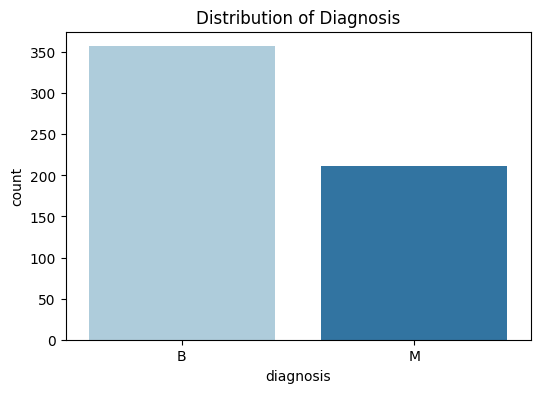

In [25]:
plt.figure(figsize=(6, 4),)
sns.countplot(x='diagnosis', hue = df.diagnosis, data=df, palette="Paired")
plt.title('Distribution of Diagnosis')
plt.show()

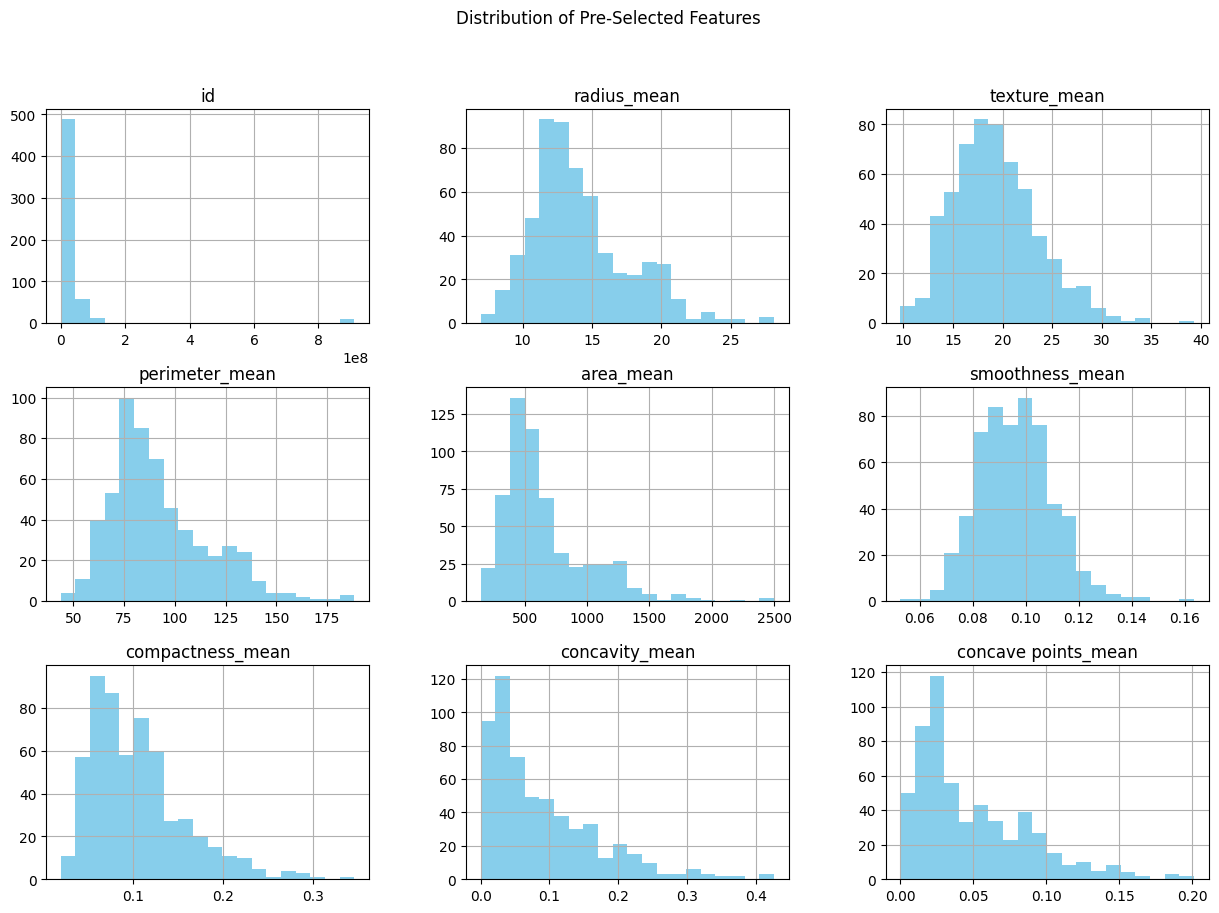

In [26]:
# Plot histograms of the first few features
df.iloc[:, :10].hist(bins=20, figsize=(15, 10), color='skyblue')
plt.suptitle("Distribution of Pre-Selected Features")
plt.show()


In [27]:
df.diagnosis = df.diagnosis.apply(lambda x: 1 if x == "M" else 0)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']


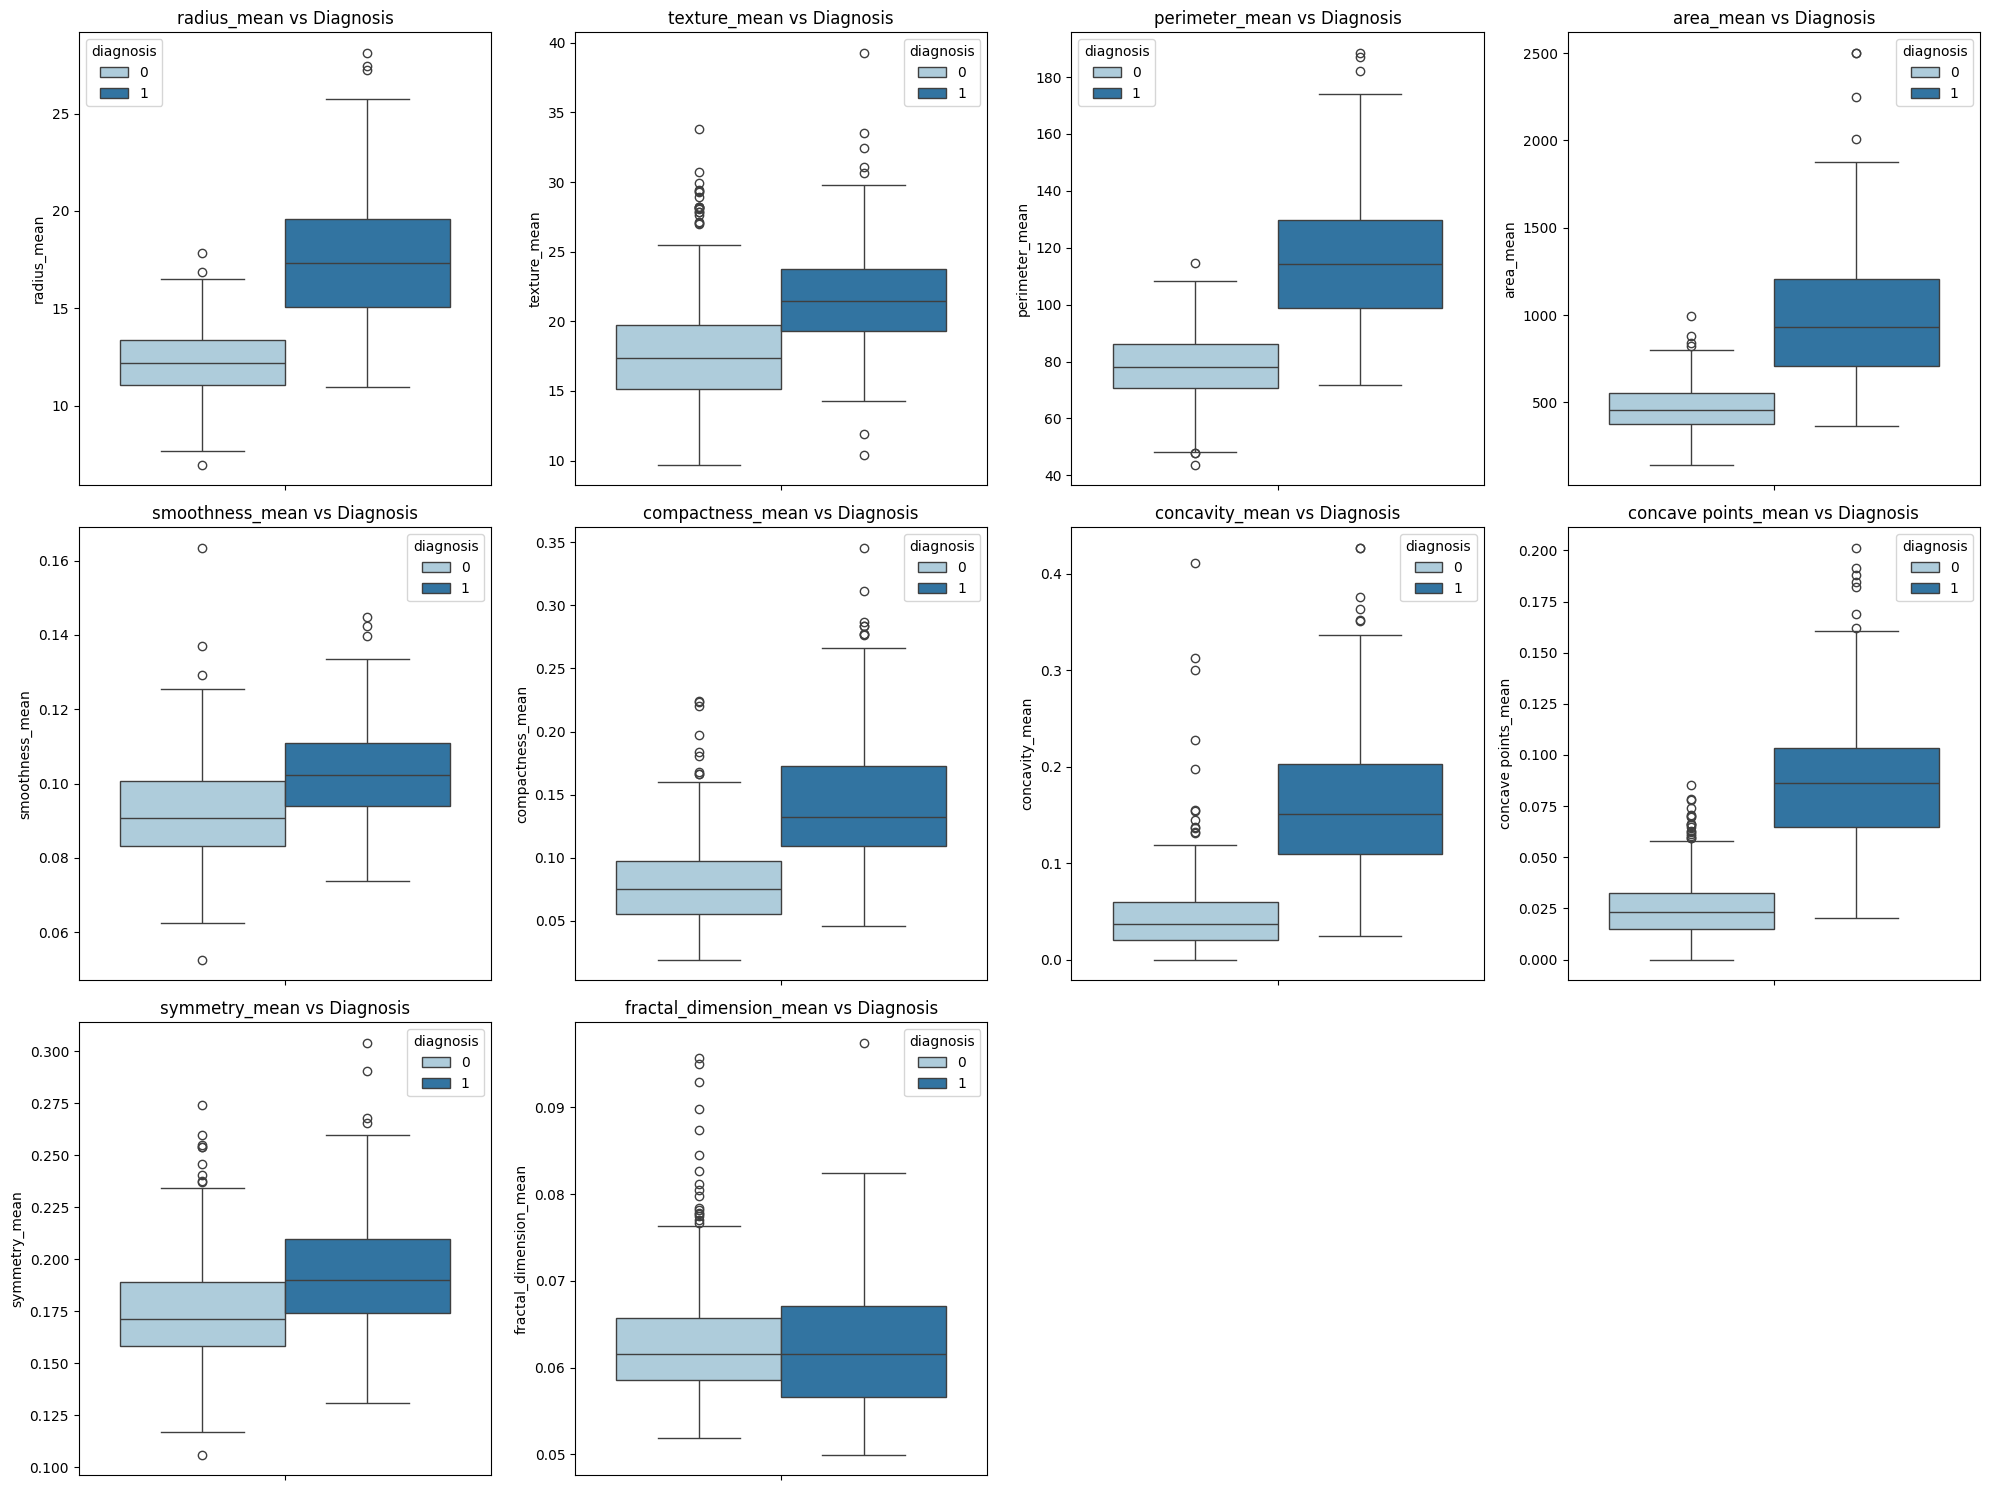

In [28]:
mean_features = [col for col in df.columns if 'mean' in col]
print(mean_features)
plt.figure(figsize=(20, 15))
for i, feature in enumerate(mean_features):
    plt.subplot(3, 4, i+1)
    sns.boxplot(hue='diagnosis', y=feature, data=df, palette='Paired')
    plt.title(f'{feature} vs Diagnosis')
plt.tight_layout()
plt.show()

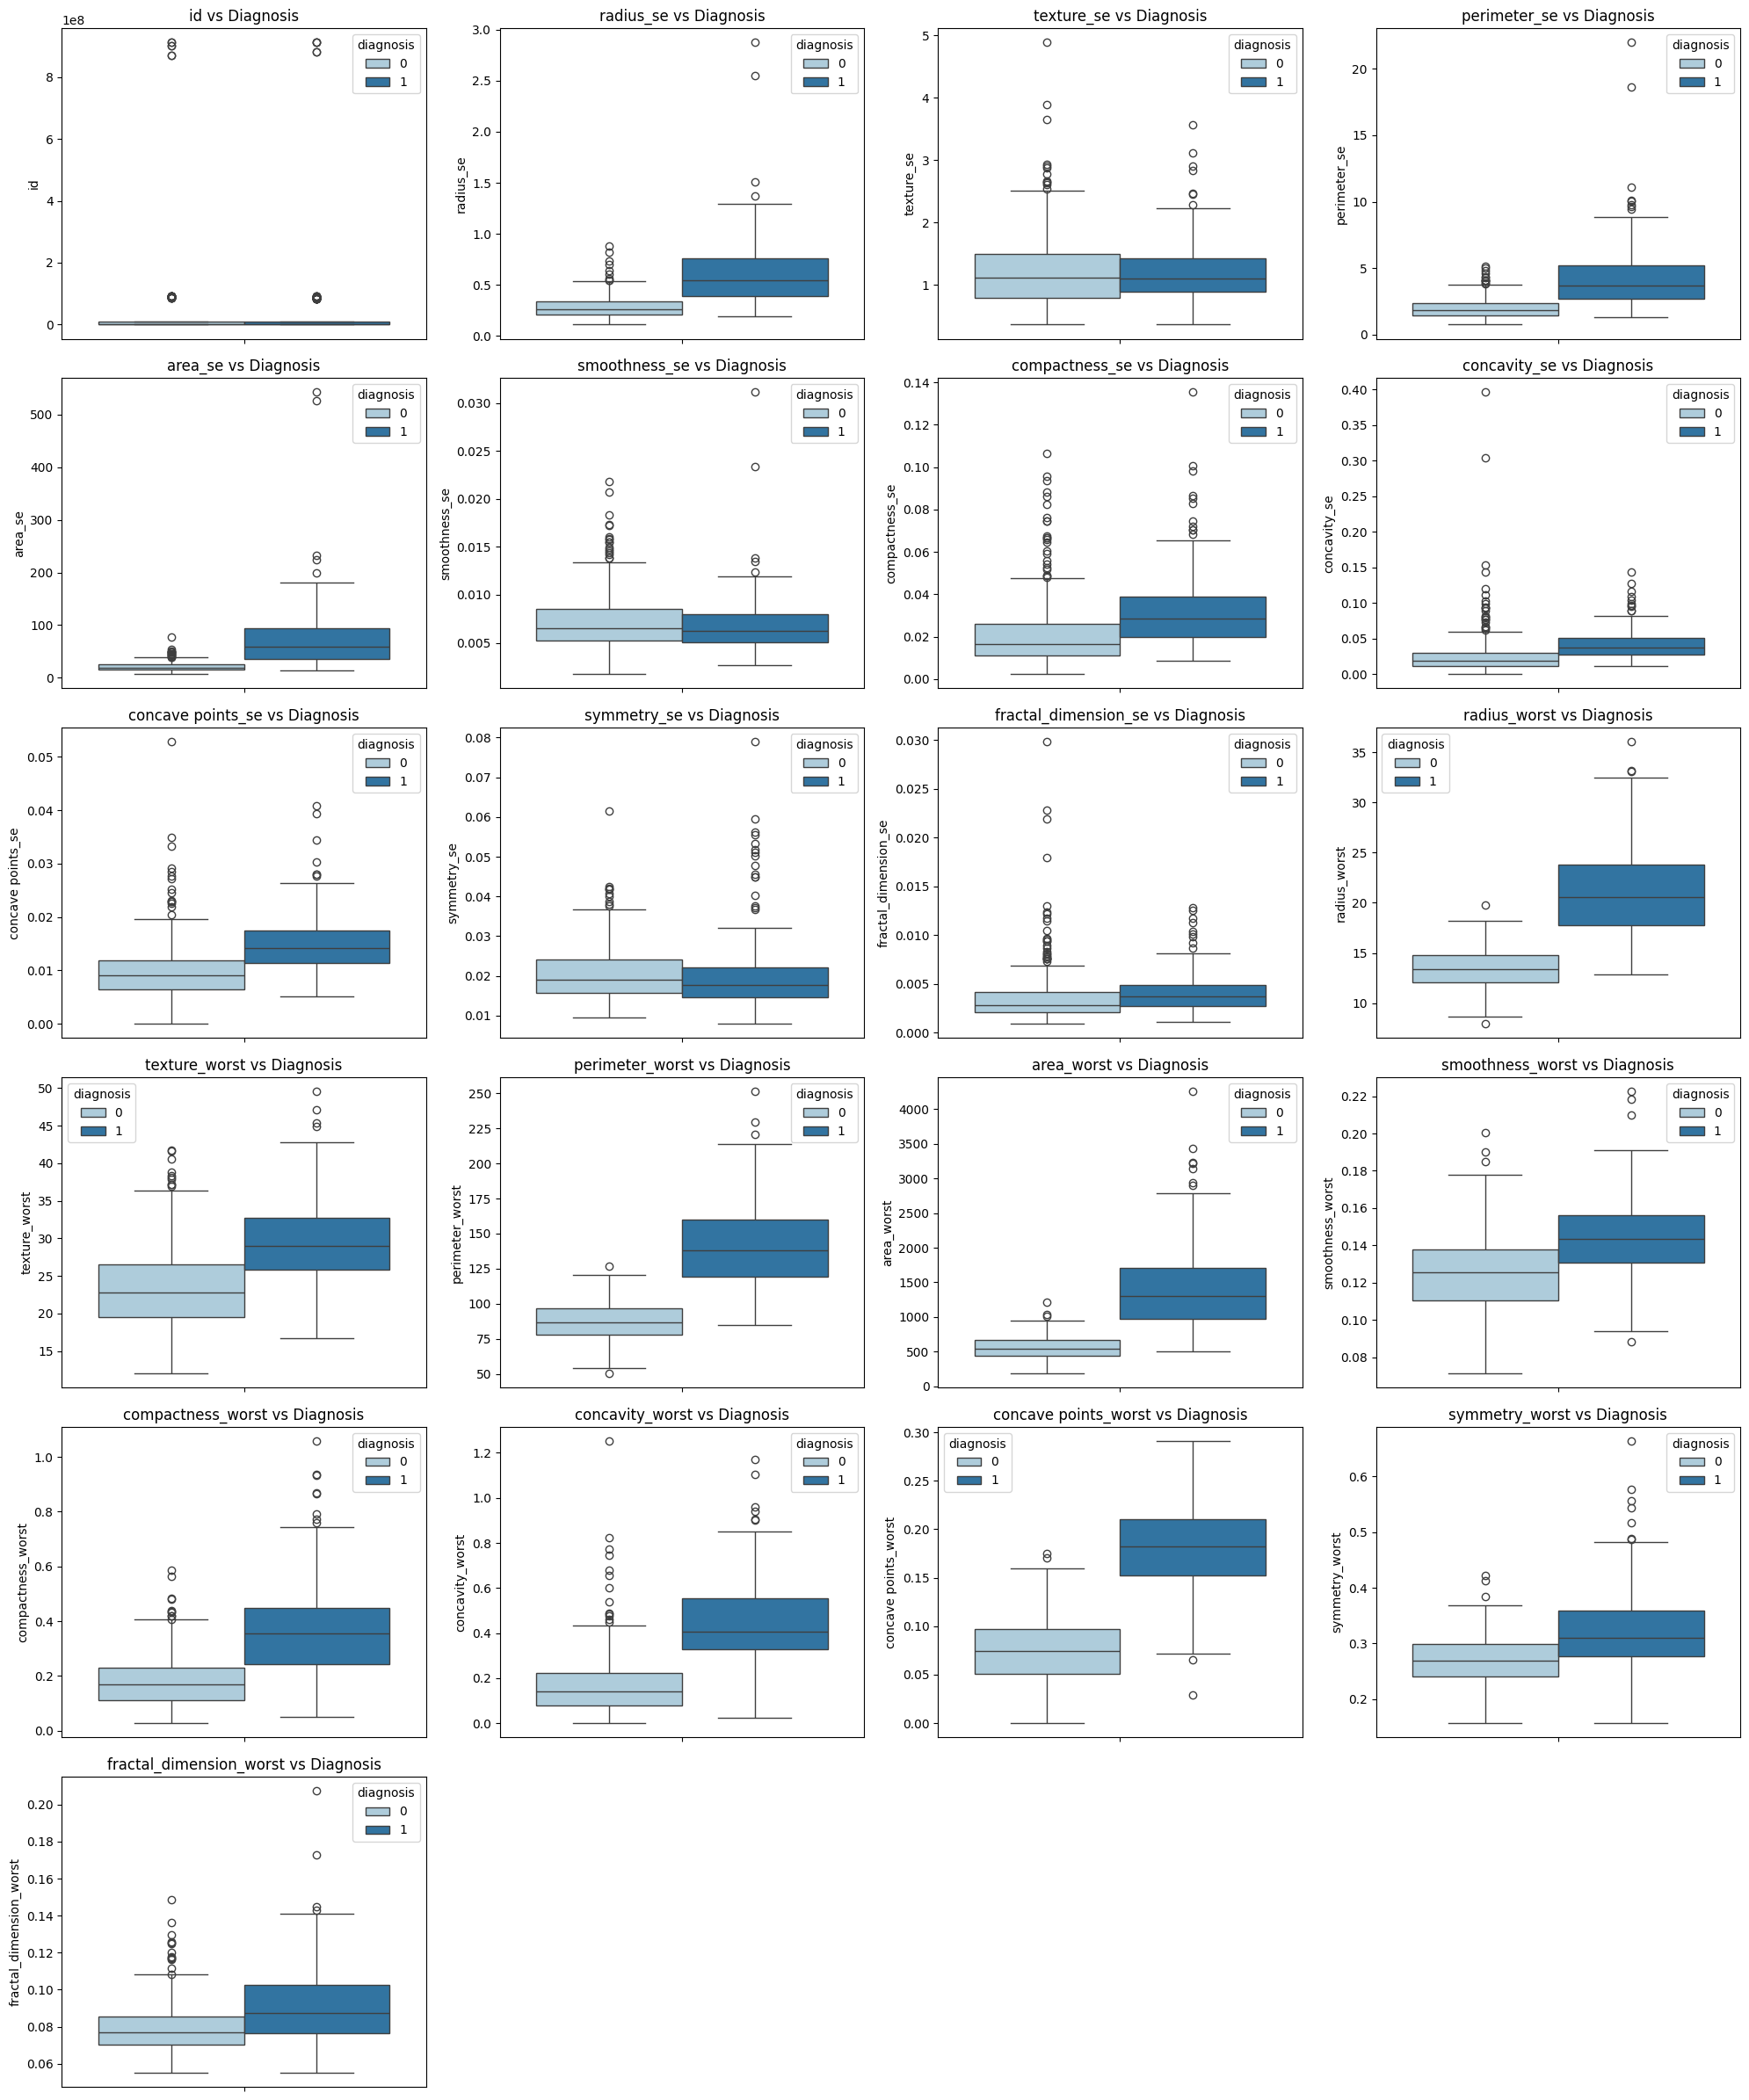

In [29]:
# Distribution des autres colonnes ( autres que ceux contenant mean)
other_features = [col for col in df.columns if 'mean' not in col and col != "diagnosis"]


num_features = len(other_features)
num_cols = 4
num_rows = (num_features + num_cols - 1) // num_cols

plt.figure(figsize=(20, 4 * num_rows))

# Boxplot de xhaque variable
for i, feature in enumerate(other_features):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(hue='diagnosis', y=feature, data=df, palette='Paired')
    plt.title(f'{feature} vs Diagnosis')

plt.tight_layout()
plt.show()


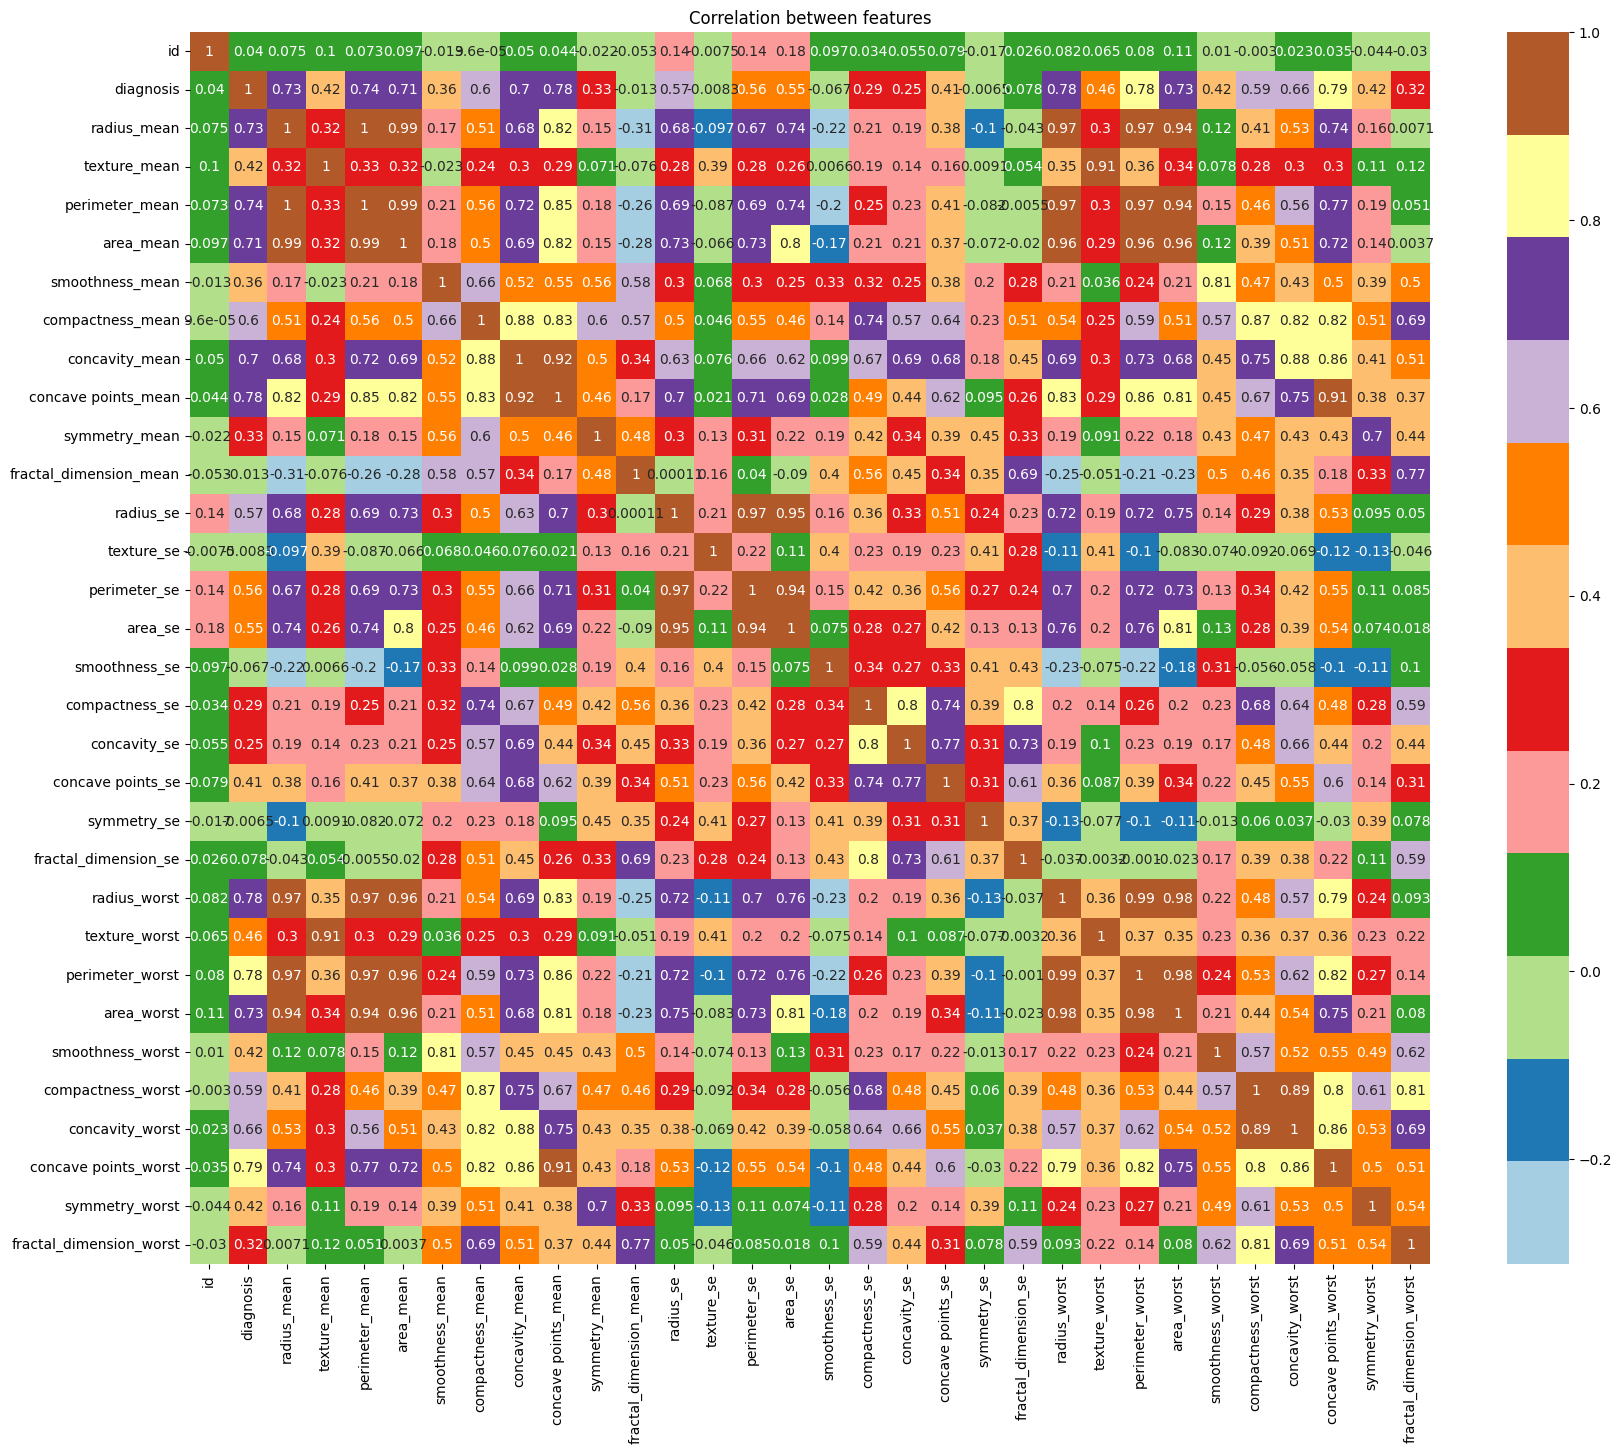

In [30]:
# Matrice de corrélation

plt.figure(figsize=(20, 16))
corr_matrix = sns.heatmap(df.corr(), annot=True, cmap='Paired')
plt.title('Correlation between features')
plt.show()

In [31]:
# Ce sera réalisé plus tard mais on le conserve ici également.

# # Top 10 des variables les plus influentes
features_correlated = df.corr()['diagnosis'].abs().sort_values(ascending=False)
# excluding diagnosis
print(features_correlated.index[1:11])


Index(['concave points_worst', 'perimeter_worst', 'concave points_mean',
       'radius_worst', 'perimeter_mean', 'area_worst', 'radius_mean',
       'area_mean', 'concavity_mean', 'concavity_worst'],
      dtype='object')


### Data Cleaning

S'agissant de données médicales, sans l'avis d'un expert, nous ne nous permettons pas d'exclure des données, consulter un tel expert nous permettrait d'avoir une vision plus claire des données dispensables.

##### Balancing the target (Undersampling)

As we don't operate oversampling on medical data, we'll have to undersample the data

Diagnosis is already converted to binary at this point.

In [32]:
df[df.diagnosis == 1].shape[0]

212

In [33]:
# Separate the two classes
class_1 = df[df.diagnosis == 1]
class_0 = df[df.diagnosis == 0]

# Randomly sample class_0 to match the number of samples in class_1
class_0_balanced = class_0.sample(n=class_1.shape[0], random_state=42)  # Set random_state for reproducibility

# Concatenate the balanced classes
balanced_df = pd.concat([class_1, class_0_balanced], ignore_index=True)
print(balanced_df.diagnosis.value_counts())

diagnosis
1    212
0    212
Name: count, dtype: int64


## Isolating changes made for future pipeline

In [34]:
# df = original_df.copy()
# # classify target, Benign as 0, Malignant as 1
# df.diagnosis = df.diagnosis.apply(lambda x: 1 if x == "M" else 0)

# # dropping useless cols
# df.drop(columns = ["id", "Unnamed: 32"], inplace=True)

In [35]:
# don't forget to do the balancing and every other operations after it again.

## Preparing for Deep Learning

### Feature Selection / Dimensionality Reduction

#### Convolution Matrix feature importance

In [62]:
# Calculate the correlation matrix
correlation_matrix = balanced_df.corr()

# Get the correlation values with the target variable 'diagnosis'
correlation_with_target = correlation_matrix["diagnosis"].abs().sort_values(ascending=False)

# Select features with high correlation with the target variable
# Here, we choose a threshold of 0.5 for high correlation, but you can adjust this value
high_correlation_features = correlation_with_target[correlation_with_target > 0.5].index.tolist()

# Remove the target variable from the list of selected features
high_correlation_features.remove("diagnosis")

print("Selected features based on correlation with target variable:")
print("retained features:",high_correlation_features)

# Highlight features not retained
all_features = balanced_df.columns.tolist()
not_retained_features = list(set(all_features) - set(high_correlation_features) - {"diagnosis"})

print("\nFeatures not retained based on correlation with target variable:")
print("not retained features:", not_retained_features)

Selected features based on correlation with target variable:
retained features: ['concave points_worst', 'perimeter_worst', 'radius_worst', 'concave points_mean', 'perimeter_mean', 'radius_mean', 'area_worst', 'area_mean', 'concavity_mean', 'concavity_worst', 'compactness_mean', 'compactness_worst', 'radius_se', 'perimeter_se', 'area_se']

Features not retained based on correlation with target variable:
not retained features: ['smoothness_se', 'compactness_se', 'fractal_dimension_se', 'symmetry_se', 'fractal_dimension_mean', 'concavity_se', 'smoothness_worst', 'id', 'texture_se', 'texture_worst', 'fractal_dimension_worst', 'concave points_se', 'smoothness_mean', 'symmetry_mean', 'texture_mean', 'symmetry_worst']


#### Experimentation: Shap Feature Importance on a basic Random Forest for reference

This is just used as a mean to compare with our feature selection algorythms to identify some values we may have missed out on.
It is not used in our following Feature selection

In [37]:
X = balanced_df.drop("diagnosis", axis=1) # Independent variables
y = balanced_df.diagnosis # Dependent variable

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Train a machine learning model

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make prediction on the testing data
y_pred = clf.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))


# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract TN, FP, FN, TP from the confusion matrix
TN, FP, FN, TP = cm.ravel()

# Calculate NPV and specificity
rf_NPV = TN / (TN + FN)
rf_specificity = TN / (TN + FP)

print(f"NPV: {rf_NPV}")
print(f"Specificity: {rf_specificity}")

# Calculate recall
rf_recall = recall_score(y_test, y_pred)

print(f"Recall: {rf_recall}")


              precision    recall  f1-score   support

           0       0.99      0.96      0.97        69
           1       0.95      0.98      0.97        59

    accuracy                           0.97       128
   macro avg       0.97      0.97      0.97       128
weighted avg       0.97      0.97      0.97       128

NPV: 0.9565217391304348
Specificity: 0.9850746268656716
Recall: 0.9508196721311475


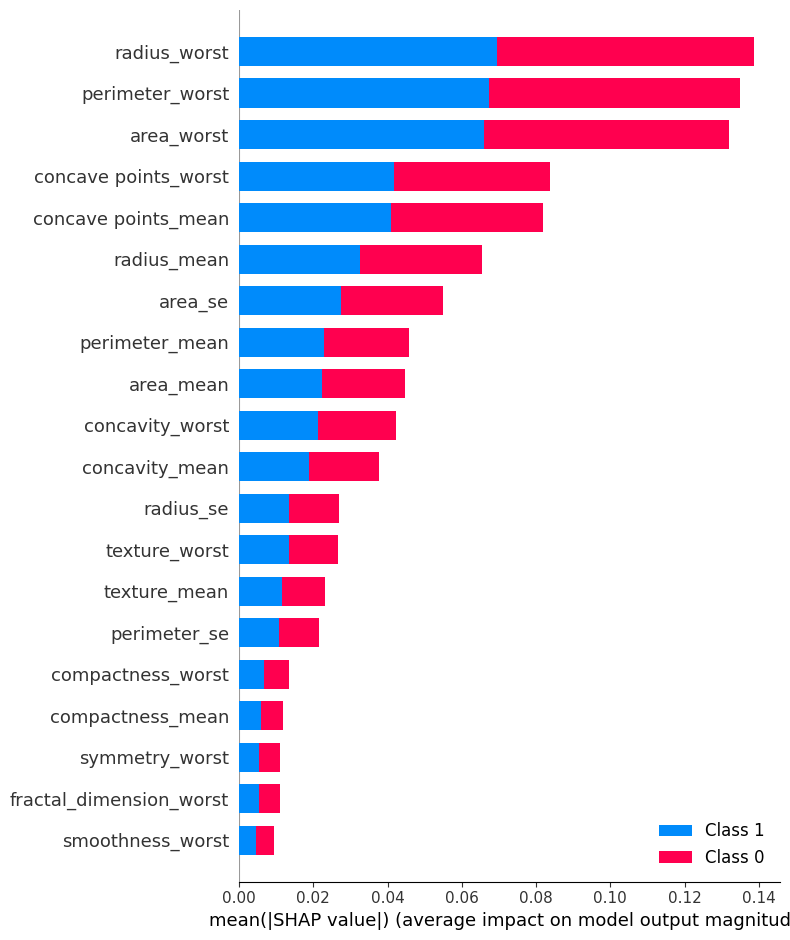

In [38]:
explainer = shap.Explainer(clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

# shap.summary_plot(shap_values[0], X_test)
# shap.dependence_plot("radius_worst", shap_values[0], X_test,interaction_index="perimeter_worst")
# shap.plots.force(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0, :], matplotlib = True)
# shap.plots.force(explainer.expected_value[1], shap_values[1][6, :], X_test.iloc[6, :],matplotlib = True)
# impact_scores = np.abs(shap_values[1]).sum(axis=1)
# most_impactful_index = np.argmax(impact_scores)  # Gives the index of the most impactful sample
# impact_scores

In [39]:
# Sum of absolute SHAP values across all samples for each feature
feature_impact_scores = np.abs(shap_values[1]).sum(axis=0)

# Creating a dictionary with feature names and their associated impact scores
impact_scores_dict = dict(zip(X_test.columns, feature_impact_scores))

# Sorting the dictionary by values (impact scores) in descending order
sorted_impact_scores_dict = dict(sorted(impact_scores_dict.items(), key=lambda item: item[1], reverse=True))

# Printing the sorted impact scores
print(sorted_impact_scores_dict)


{'radius_worst': 8.880524066686952, 'perimeter_worst': 8.630197202188734, 'area_worst': 8.45387774742057, 'concave points_worst': 5.355551962036149, 'concave points_mean': 5.244348878813111, 'radius_mean': 4.183484479567307, 'area_se': 3.5245363029089694, 'perimeter_mean': 2.931629797784783, 'area_mean': 2.8626417085789684, 'concavity_worst': 2.709579012935393, 'concavity_mean': 2.4161188547366415, 'radius_se': 1.7294452347210487, 'texture_worst': 1.7143926366916347, 'texture_mean': 1.4801225532782303, 'perimeter_se': 1.3851632934636953, 'compactness_worst': 0.867627569153766, 'compactness_mean': 0.7612632792840135, 'symmetry_worst': 0.7059606459283403, 'fractal_dimension_worst': 0.7006666203609805, 'smoothness_worst': 0.5996706945995355, 'smoothness_mean': 0.4702848451314734, 'concavity_se': 0.332871778483931, 'symmetry_se': 0.2841865175826872, 'fractal_dimension_mean': 0.281707740140014, 'smoothness_se': 0.27483799445373897, 'texture_se': 0.2596272190985671, 'concave points_se': 0.20

#### Boruta

In [ ]:
# Boruta is not up to date with the latests versions of numpy so we need to do this to fix the int error
np.int = np.int32
np.float = np.float64
np.bool = np.bool_


# Get the names of the features
features_names = balanced_df.drop(columns=['diagnosis']).columns

rf = RandomForestRegressor(n_estimators=200, n_jobs=-1, max_depth=5)

feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=42)

# find all relevant features
feat_selector.fit(balanced_df.drop(columns=['diagnosis']).values, balanced_df.diagnosis.values)

# check selected features
print(feat_selector.support_)


# check ranking of features
print(feat_selector.ranking_)


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	19
Iteration: 	9 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	19
Iteration: 	10 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	19
Iteration: 	11 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	19
Iteration: 	12 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	19
Iteration: 	13 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	19
Iteration: 	14 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	19
Iteration: 	15 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	19
Iteration: 	16 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 

In [41]:


# Map the boolean array to feature names
boruta_selected_features = features_names[feat_selector.support_]

# Convert to a list (if needed)
boruta_selected_features_list = boruta_selected_features.tolist()
boruta_selected_features_list

['texture_mean',
 'concavity_mean',
 'concave points_mean',
 'area_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst']

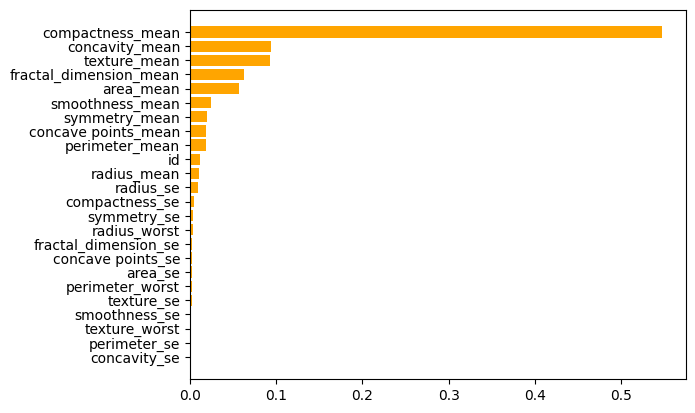

In [42]:
from sklearn.feature_selection import RFECV

f_i = list(zip(features_names,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()


In [ ]:
rfe = RFECV(estimator=rf, cv=5, scoring="neg_mean_squared_error", verbose=1, importance_getter='auto')
rfe.fit(X_train, y_train)


Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features

RFECV(cv=5,
      estimator=RandomForestRegressor(max_depth=5, n_estimators=97, n_jobs=-1,
                                      random_state=RandomState(MT19937) at 0x7FACCA220240),
      scoring='neg_mean_squared_error', verbose=1)

In [91]:
# Get the ranking of features
feature_ranking = rfe.ranking_

# Normalize the ranking to a scale from 0 to 1
normalized_ranking = (feature_ranking - feature_ranking.min()) / (feature_ranking.max() - feature_ranking.min())

# Create a DataFrame to display the feature names and their normalized ranking
feature_importance_df = pd.DataFrame({
    'Feature': features_names,
    'Normalized Ranking': normalized_ranking
})

print(feature_importance_df)

                    Feature  Normalized Ranking
0                        id                0.05
1               radius_mean                0.25
2              texture_mean                0.00
3            perimeter_mean                0.65
4                 area_mean                0.50
5           smoothness_mean                0.75
6          compactness_mean                0.45
7            concavity_mean                0.10
8       concave points_mean                0.00
9             symmetry_mean                1.00
10   fractal_dimension_mean                0.35
11                radius_se                0.40
12               texture_se                0.80
13             perimeter_se                0.15
14                  area_se                0.00
15            smoothness_se                0.85
16           compactness_se                0.90
17             concavity_se                0.20
18        concave points_se                0.95
19              symmetry_se             

In [101]:
rf_selected_features = np.array(features_names)[rfe.get_support()]
print(rf_selected_features)

# Get the ranking of features
feature_ranking = rfe.ranking_

# Normalize the ranking to a scale from 0 to 1
normalized_ranking = (1 - (feature_ranking - feature_ranking.min()) / (feature_ranking.max() - feature_ranking.min()))*5
# normalized_ranking = (feature_ranking - feature_ranking.min()) / (feature_ranking.max() - feature_ranking.min())


# Create a DataFrame to display the feature names and their normalized ranking
feature_importance_df = pd.DataFrame({
    'Feature': features_names,
    'Normalized_Ranking': normalized_ranking
})

# Filter the DataFrame to only keep features in rf_selected_features
filtered_df = feature_importance_df[feature_importance_df['Feature'].isin(rf_selected_features)]

# Update the Normalized_Ranking column with the corresponding values from normalized_ranking
filtered_df['Normalized_Ranking'] = filtered_df['Feature'].apply(lambda x: normalized_ranking[features_names.get_loc(x)])

print(filtered_df)


['texture_mean' 'concave points_mean' 'area_se' 'radius_worst'
 'texture_worst' 'perimeter_worst' 'area_worst' 'smoothness_worst'
 'concavity_worst' 'concave points_worst' 'symmetry_worst']
                 Feature  Normalized_Ranking
2           texture_mean                 5.0
8    concave points_mean                 5.0
14               area_se                 5.0
21          radius_worst                 5.0
22         texture_worst                 5.0
23       perimeter_worst                 5.0
24            area_worst                 5.0
25      smoothness_worst                 5.0
27       concavity_worst                 5.0
28  concave points_worst                 5.0
29        symmetry_worst                 5.0


/tmp/ipykernel_6497/404184456.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Our choice

We decided to mix 3 different process for now:
- most correlated from the Correlation Matrix 
- Boruta
- Random Forest as a feature selection tool

In [45]:
features_in_common,features_in_atleast_two, unique_features = compare_feature_lists(high_correlation_features, boruta_selected_features, rf_selected_features)

# THEN ADD MATCH WITH corr matrix results

#### Visual Representation of Feature Selection

In [ ]:
import plotly.graph_objects as go


# # Calculate the correlation matrix
# correlation_matrix = balanced_df.corr()

# # Get the correlation values with the target variable 'diagnosis'
# correlation_with_target = correlation_matrix["diagnosis"].abs().sort_values(ascending=False)

# # Select features with high correlation with the target variable
# # Here, we choose a threshold of 0.5 for high correlation, but you can adjust this value
# high_correlation_features = correlation_with_target[correlation_with_target > 0.5].index.tolist()

# # Remove the target variable from the list of selected features
# high_correlation_features.remove("diagnosis")

# print("Selected features based on correlation with target variable:")
# print("retained features:",high_correlation_features)

# # Highlight features not retained
# all_features = balanced_df.columns.tolist()
# not_retained_features = list(set(all_features) - set(high_correlation_features) - {"diagnosis"})

# print("\nFeatures not retained based on correlation with target variable:")
# print("not retained features:", not_retained_features)


features_in_common


corr_perf_dict = correlation_with_target[correlation_with_target > 0.5]
corr_perf_dict = (corr_perf_dict / corr_perf_dict.max()) * 5

fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r=corr_perf_dict,
      theta=corr_perf_dict.index.tolist(),
      fill='toself',
      name='Matrix Correlation'
))
# fig.add_trace(go.Scatterpolar(
#       r=[4, 3, 2.5, 1, 2],
#       theta=categories,
#       fill='toself',
#       name='Product B'
# ))


boruta_perf_dict = correlation_with_target[boruta_selected_features_list]
boruta_perf_dict = (boruta_perf_dict / boruta_perf_dict.max()) * 5
boruta_perf_dict = boruta_perf_dict.reindex(features_in_common).dropna()
# boruta_perf_dict = boruta_perf_dict.reindex(correlation_with_target.index.intersection(boruta_perf_dict.index))
fig.add_trace(go.Scatterpolar(
    r=boruta_perf_dict,
    theta=boruta_perf_dict.index.tolist(),
    fill='toself',
    name='Boruta'
))

dict(filtered_df['Normalized_Ranking'], index=filtered_df['Feature'])

rf_perf_dict = filtered_df.reindex(correlation_with_target.index.intersection(filtered_df.index))
print(rf_perf_dict)
fig.add_trace(go.Scatterpolar(
    r=rf_perf_dict,
    theta=rf_perf_dict.index.tolist(),
    # fill='toself',
    name='Random Forest'
))
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=False
)

fig.show()

In [ ]:

features_in_common

# Filter the correlation_with_target, boruta_perf_dict, and rf_perf_dict to only include features in common
corr_perf_dict = correlation_with_target[features_in_common]
corr_perf_dict = (corr_perf_dict / corr_perf_dict.max()) * 5

fig = go.Figure()
fig.add_trace(go.Scatterpolar(
    r=corr_perf_dict,
    theta=corr_perf_dict.index.tolist(),
    fill='toself',
    name='Matrix Correlation'
))

# Filter boruta_perf_dict to only include features in common
boruta_perf_dict = boruta_perf_dict.reindex(features_in_common).dropna()
boruta_perf_dict = (boruta_perf_dict / boruta_perf_dict.max()) * 5
fig.add_trace(go.Scatterpolar(
    r=boruta_perf_dict,
    theta=boruta_perf_dict.index.tolist(),
    fill='toself',
    name='Boruta'
))

# Filter rf_perf_dict to only include features in common
rf_perf_dict = rf_perf_dict.reindex(features_in_common).dropna()
rf_perf_dict = (rf_perf_dict / rf_perf_dict.max()) * 5
fig.add_trace(go.Scatterpolar(
    r=rf_perf_dict,
    theta=rf_perf_dict.index.tolist(),
    fill='toself',
    name='Random Forest'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
    visible=True,
    range=[0, 5]
    )),
  showlegend=False
)

fig.show()


### Preprocessing

#### Scaling

In [46]:
scaler = RobustScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(balanced_df[features_in_common]), columns=features_in_common)
df_scaled['diagnosis'] = balanced_df['diagnosis'].values
df_scaled.head()

,concave points_worst,perimeter_worst,radius_worst,concave points_mean,area_worst,concavity_worst,area_se,diagnosis
0,1.240161,2.835406,2.778468,1.899105,4.615670,1.384655,13.064198,1
1,1.133077,1.257254,1.029676,1.763301,1.132170,1.675116,2.227524,1
2,0.268168,1.108998,1.181504,0.533072,1.461852,0.464292,1.046892,1
3,-0.378180,0.196050,0.276052,-0.344544,0.292211,-0.181709,-0.170389,1
4,0.471353,1.083638,1.137336,0.413724,1.383734,1.130502,1.000064,1


#### VIF

In [47]:
df_scaled.head()
# Ideally we'll compare it to a version with another deep with values in top 5 of Shap

,concave points_worst,perimeter_worst,radius_worst,concave points_mean,area_worst,concavity_worst,area_se,diagnosis
0,1.240161,2.835406,2.778468,1.899105,4.615670,1.384655,13.064198,1
1,1.133077,1.257254,1.029676,1.763301,1.132170,1.675116,2.227524,1
2,0.268168,1.108998,1.181504,0.533072,1.461852,0.464292,1.046892,1
3,-0.378180,0.196050,0.276052,-0.344544,0.292211,-0.181709,-0.170389,1
4,0.471353,1.083638,1.137336,0.413724,1.383734,1.130502,1.000064,1


In [48]:
# Split into train and test
X_train_vif, X_test_vif, y_train_vif, y_test_vif = train_test_split(df_scaled.drop(columns=["diagnosis"]), df_scaled.diagnosis,\
    test_size=0.3, random_state=1)


vif_data = pd.DataFrame()
vif_data["feature"] = list(X_train_vif)
vif_data["VIF"] = [variance_inflation_factor(X_train_vif, i)
                          for i in range(len(X_train_vif.columns))]

print('VIF (facteur d\'inflation de la variance)')
print(vif_data)

VIF (facteur d'inflation de la variance)
                feature         VIF
0  concave points_worst   10.306733
1       perimeter_worst  119.504669
2          radius_worst  146.213963
3   concave points_mean    9.042031
4            area_worst   48.407071
5       concavity_worst    4.224525
6               area_se    4.522290


In [49]:
# Split into train and test
X_train_vif, X_test_vif, y_train_vif, y_test_vif = train_test_split(df_scaled.drop(columns=["diagnosis"])\
    .drop(columns=["radius_worst", "concave points_mean", "perimeter_worst"]), df_scaled.diagnosis,\
    test_size=0.3, random_state=1)


vif_data = pd.DataFrame()
vif_data["feature"] = list(X_train_vif)
vif_data["VIF"] = [variance_inflation_factor(X_train_vif, i)
                          for i in range(len(X_train_vif.columns))]

print('VIF (facteur d\'inflation de la variance)')
print(vif_data)

VIF (facteur d'inflation de la variance)
                feature       VIF
0  concave points_worst  5.590291
1            area_worst  5.030877
2       concavity_worst  3.856353
3               area_se  3.324330


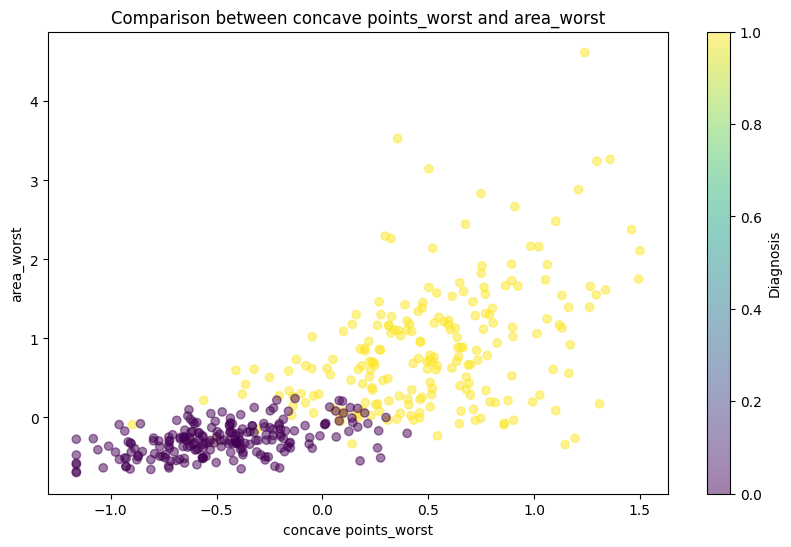

In [50]:
import matplotlib.pyplot as plt

# Scatter plot to compare concave points_worst and area_worst
plt.figure(figsize=(10, 6))
plt.scatter(df_scaled['concave points_worst'], df_scaled['area_worst'], \
    alpha=0.5, c=df_scaled['diagnosis'], cmap='viridis')
plt.title('Comparison between concave points_worst and area_worst')
plt.xlabel('concave points_worst')
plt.ylabel('area_worst')
plt.colorbar(label='Diagnosis')
plt.show()

So we indeed see a clear colinearity between the two remaining vars so we'll slightly change the recipe.

In [51]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(df_scaled.drop(columns=["diagnosis"])\
    .drop(columns=["area_worst", "radius_worst"]), df_scaled.diagnosis,\
    test_size=0.3, random_state=1)


vif_data = pd.DataFrame()
vif_data["feature"] = list(X_train)
vif_data["VIF"] = [variance_inflation_factor(X_train, i)
                          for i in range(len(X_train.columns))]

print('VIF (facteur d\'inflation de la variance)')
print(vif_data)

VIF (facteur d'inflation de la variance)
                feature       VIF
0  concave points_worst  9.862060
1       perimeter_worst  6.179612
2   concave points_mean  8.747979
3       concavity_worst  3.907472
4               area_se  3.229660


### Choosing Metrics

Le ``Recall`` mesure la capacité du modèle à identifier correctement les cas positifs (ici les patients atteint d'une tumeur maligne). Dans un contexte médical, il est essentiel de minimiser les faux négatifs, on va donc s'intéresser également à la ``spécificité`` et au ``NPV``(Negativite Predictive Value)


``Recall`` measures the model's ability to correctly identify positive cases (in this case, patients with a malignant tumor). In a medical context, it is crucial to minimize false negatives. We will also take ``NPV`` (Negative Predictive Value) (healthy patients being correctly classified as healthy) into consideration while keeping the ``specificity``( to avoid a high count of healthy patients being misclassified as sick) as high as possible to ensure we won't accidentally classify too many healthy individuals as sick either.

<img src="data/img/NPV.webp" style="height:100px" />

So We'll focus on recall while taking the other two into consideration

## Modelisation

### Running the perceptron

In [52]:
# Création et entraînement du perceptron
perceptron = Perceptron_v1(num_inputs=X_train.shape[1])
perceptron.train(X_train.values, y_train.values)

# Faire des prédictions sur les données de test
predictions = [perceptron.predict(x) for x in X_test.values]

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, predictions)
TN, FP, FN, TP = cm.ravel()

# Calcul des métriques
perceptron_recall = TP / (TP + FN)
perceptron_npv = TN / (TN + FN)
perceptron_specificity = TN / (TN + FP)

print(f"Recall: {perceptron_recall:.2f}")
print(f"NPV: {perceptron_npv:.2f}")
print(f"Specificity: {perceptron_specificity:.2f}")

Recall: 0.97
NPV: 0.97
Specificity: 0.93


### Reexecuting the Random Forest Classifier with selected features

In [53]:
# Train a machine learning model using the new selected features
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make prediction on the testing data
y_pred = clf.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))


# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract TN, FP, FN, TP from the confusion matrix
TN, FP, FN, TP = cm.ravel()

# Calculate NPV and specificity
rf_NPV = TN / (TN + FN)
rf_specificity = TN / (TN + FP)

# Calculate recall
rf_recall = recall_score(y_test, y_pred)

print(f"Recall: {rf_recall}")
print(f"NPV: {rf_NPV}")
print(f"Specificity: {rf_specificity}")

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.93      0.95      0.94        60

    accuracy                           0.95       128
   macro avg       0.94      0.95      0.95       128
weighted avg       0.95      0.95      0.95       128

Recall: 0.9344262295081968
NPV: 0.9411764705882353
Specificity: 0.9552238805970149


### Running a very basic Deep Learning model

In [54]:
df_scaled[features_in_common].dtypes

concave points_worst    float64
perimeter_worst         float64
radius_worst            float64
concave points_mean     float64
area_worst              float64
concavity_worst         float64
area_se                 float64
dtype: object

In [55]:
from keras.layers import Dropout

# Set up early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',    # Monitor validation loss for improvement
    patience=50,            # Number of epochs to wait for improvement
    restore_best_weights=True  # Restore model weights from the epoch with the best performance
)


# Define the model
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer with sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[Recall()])

# Train the model
history = model.fit(X_train, y_train, epochs=2000, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int64")
deep_recall = recall_score(y_test, y_pred)
print("Test Recall:", deep_recall)

# Confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Specificity
deep_specificity = tn / (tn + fp)
print(f"Specificity: {deep_specificity}")

# NPV (Negative Predictive Value)
deep_npv = tn / (tn + fn)
print(f"NPV: {deep_npv}")

Epoch 1/2000
10/10 [==============================] - 1s 28ms/step - loss: 0.6787 - recall: 0.6755 - val_loss: 0.6033 - val_recall: 0.9672
Epoch 2/2000
10/10 [==============================] - 0s 7ms/step - loss: 0.5675 - recall: 0.9338 - val_loss: 0.4886 - val_recall: 0.9672
Epoch 3/2000
10/10 [==============================] - 0s 6ms/step - loss: 0.4650 - recall: 0.9603 - val_loss: 0.3667 - val_recall: 0.9672
Epoch 4/2000
10/10 [==============================] - 0s 6ms/step - loss: 0.3575 - recall: 0.9470 - val_loss: 0.2506 - val_recall: 0.9672
Epoch 5/2000
10/10 [==============================] - 0s 6ms/step - loss: 0.2687 - recall: 0.9536 - val_loss: 0.1687 - val_recall: 0.9672
Epoch 6/2000
10/10 [==============================] - 0s 6ms/step - loss: 0.2037 - recall: 0.9338 - val_loss: 0.1289 - val_recall: 0.9672
Epoch 7/2000
10/10 [==============================] - 0s 6ms/step - loss: 0.1708 - recall: 0.9404 - val_loss: 0.1193 - val_recall: 0.9672
Epoch 8/2000
10/10 [=============

In [ ]:
!pip freeze > requirements.txt

## Table comparing model results

In [57]:
# Create a dictionary with the metrics
metrics = {
    'Model': ["Perceptron", 'Random Forest', 'Deep Learning'],
    "Recall": [perceptron_recall, rf_recall, deep_recall],
    'NPV': [perceptron_npv, rf_NPV, deep_npv],
    'Specificity': [perceptron_specificity, rf_specificity, deep_specificity]
}

# Create a DataFrame from the dictionary
metrics_df = pd.DataFrame(metrics)

# Display the DataFrame
print(metrics_df)

           Model    Recall       NPV  Specificity
0     Perceptron  0.967213  0.968750     0.925373
1  Random Forest  0.934426  0.941176     0.955224
2  Deep Learning  0.967213  0.970149     0.970149


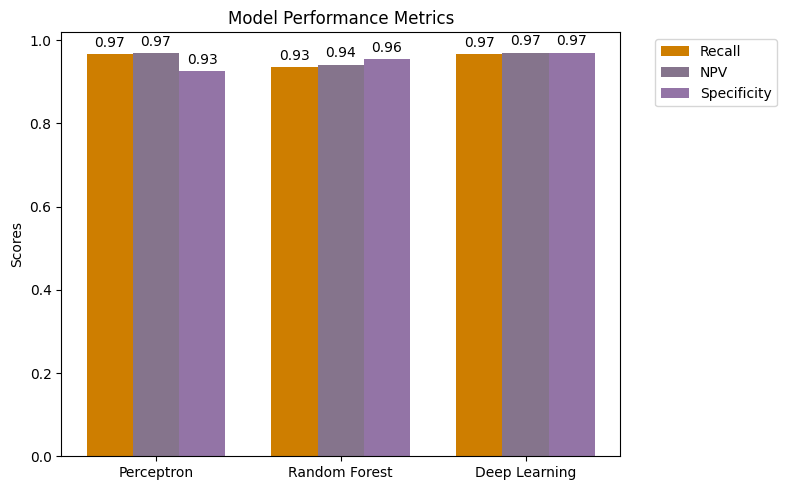

In [58]:
# Data for plotting
models = metrics_df["Model"]
recall = metrics_df["Recall"]
npv = metrics_df["NPV"]
specificity = metrics_df["Specificity"]

# Plot grouped bar chart
x = np.arange(len(models))  # Label locations
width = 0.25  # Width of bars

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - width, recall, width, label="Recall", color="#CE7E00")
rects2 = ax.bar(x, npv, width, label="NPV", color="#85748C")
rects3 = ax.bar(x + width, specificity, width, label="Specificity", color="#9374A6")

# Add labels, title, and legend
ax.set_ylabel("Scores")
ax.set_title("Model Performance Metrics")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add value annotations
for rects in [rects1, rects2, rects3]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

# Save and show the plot
plt.tight_layout()
plt.savefig("image/result_comparison.png")
plt.show()

## Feature importance of our perceptron

Using 296 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 128/128 [00:11<00:00, 11.03it/s]


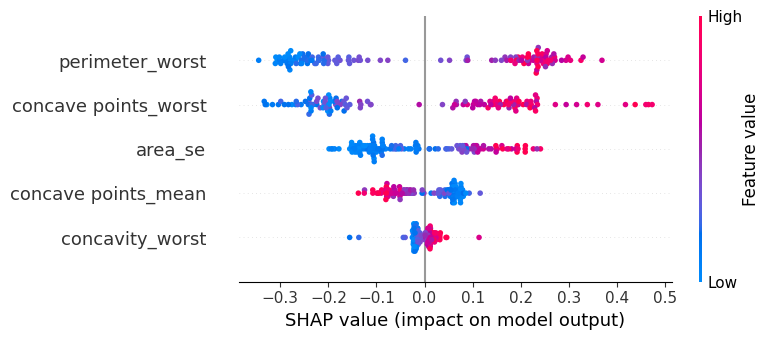

In [59]:
# Wrapper function for SHAP
def perceptron_predict(X):
    return np.array([perceptron.predict(x) for x in X])

# Use SHAP with the perceptron model
explainer = shap.KernelExplainer(perceptron_predict, X_train)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)

## Conclusion

``Concluez sur l’efficacité d’un Perceptron sur ce type de problématique
puis, proposez des solutions sans les implémenter.``

Comme on pouvait s'y attendre, les performances d'un perceptron unique sont inferieur à celle d'un modèle basique de Machine Learning/Deep Learning, on remarque cependant que vu sa "simplicité" les résultats atteint dépassent tout de même la basiline et semble assez correcte.

petit passage comme quoi notre perceptron est nul et c'est en explorant d'autres stratégies comme le backtracking qu'on attendra de très bon résultat

Il n'en reste pas moins que la technologie employée est limitée, et en implémentant des méthodes de backtracking et rétropogatation nous attendons des résultats plus probant bien que n'atteignant pas la performance des modèles de ml & Deep Learning reconnus.